In [1]:
import pandas as pd


In [2]:
datos= pd.read_csv('base.csv')
datos.head()

,CodPostal,Sexo,Edad,Color,Años_Estudio,Renta,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [ ]:
#estadistica descriptiva: datos descriptivos de la base de datos
#estadistica inferencial: interpretación de los datos

# Estadística descriptiva

In [6]:
# personas de sexo masculino: frecuencia de sexo masculino
frecuencia =datos['Sexo'].value_counts()
frecuencia

Sexo
0    53250
1    23590
Name: count, dtype: int64

In [7]:
#lo anterior de manera normalizada, en porcentaje
porcentual =datos['Sexo'].value_counts(normalize=True)*100
porcentual

Sexo
0    69.299844
1    30.700156
Name: proportion, dtype: float64

In [9]:
# 
dist_frec_cualitativa =pd.DataFrame({'Frecuenci': frecuencia, 'Porcentual(%)': porcentual})
dist_frec_cualitativa

,Frecuenci,Porcentual(%)
Sexo,,
0,53250,69.299844
1,23590,30.700156


# Para más de una variable cualitativa

In [11]:
sexo = {0: 'Masculino',
        1: 'Femenino'}

color = {0: 'Indígena',
         2: 'Blanca',
         4: 'Negra',
         6: 'Amarilla',
         8: 'Marrón',
         9: 'NA'}

In [13]:
# cruce entre má de una varibale
frecuencia= pd.crosstab(datos.Sexo,datos.Color)
frecuencia

Color,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [15]:
# cruce entre má de una varibale
# cruce para obtener la cantidad de personas por sexo y color
porcentual= pd.crosstab(datos.Sexo,datos.Color, normalize=True)*100
#cambiamos el indice 
porcentual.rename(index=sexo, inplace=True)
#cambiamos las columnas
porcentual.rename(columns=color, inplace=True)

porcentual

Color,Indígena,Blanca,Negra,Amarilla,Marrón
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Femenino,0.131442,12.520822,3.759761,0.152264,14.135867


In [18]:
# ejercicio
#cruce para obtener la renta media por sexo y color
porcentual= pd.crosstab(datos.Sexo,datos.Color, aggfunc='mean', values=datos.Renta)
#cambiamos el indice 
porcentual.rename(index=sexo, inplace=True)
#cambiamos las columnas
porcentual.rename(columns=color, inplace=True)

porcentual

Color,Indígena,Blanca,Negra,Amarilla,Marrón
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Femenino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


# Para variables cuantitativas

In [21]:
# categorización de la columna en caso de variable cuantitativa

import numpy as np

n=datos.shape[0]
n

76840

In [24]:
k=1+(10/3)*np.log10(n)
k= int(k.round(0))
k

17

In [33]:
# paso 2. Ccrear frecuencias

frecuencia= pd.value_counts(
    pd.cut(
        x=datos.Renta,
        bins =k,
        include_lowest=True

    ),
    sort=False

)


frecuencia

C:\Users\zazaz\AppData\Local\Temp\ipykernel_14280\273757464.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frecuencia= pd.value_counts(


Renta
(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: count, dtype: int64

In [30]:
# paso 2.  de manera porcentual

porcentual= pd.value_counts(
    pd.cut(
        x=datos.Renta,
        bins =k,
        include_lowest=True

    ),
    sort=False,
    normalize=True

)


porcentual

# nos da un output de la cantidad de personas que se encuentran 
# entre los sueldos más bajos

C:\Users\zazaz\AppData\Local\Temp\ipykernel_14280\1133621187.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  porcentual= pd.value_counts(


Renta
(-200.001, 11764.706]       0.983784
(11764.706, 23529.412]      0.013300
(23529.412, 35294.118]      0.002199
(35294.118, 47058.824]      0.000247
(47058.824, 58823.529]      0.000208
(58823.529, 70588.235]      0.000065
(70588.235, 82352.941]      0.000052
(82352.941, 94117.647]      0.000013
(94117.647, 105882.353]     0.000078
(105882.353, 117647.059]    0.000000
(117647.059, 129411.765]    0.000013
(129411.765, 141176.471]    0.000000
(141176.471, 152941.176]    0.000000
(152941.176, 164705.882]    0.000000
(164705.882, 176470.588]    0.000000
(176470.588, 188235.294]    0.000000
(188235.294, 200000.0]      0.000039
Name: proportion, dtype: float64

In [34]:
dist_frec_cuantitativas= pd.DataFrame({'Frecuencia': frecuencia,'Porcentual': porcentual})
dist_frec_cuantitativas

,Frecuencia,Porcentual
Renta,,
"(-200.001, 11764.706]",75594,0.983784
"(11764.706, 23529.412]",1022,0.013300
"(23529.412, 35294.118]",169,0.002199
"(35294.118, 47058.824]",19,0.000247
"(47058.824, 58823.529]",16,0.000208
"(58823.529, 70588.235]",5,0.000065
"(70588.235, 82352.941]",4,0.000052
"(82352.941, 94117.647]",1,0.000013
"(94117.647, 105882.353]",6,0.000078


# Histograama


<AxesSubplot: title={'center': 'Distribucion de Frecuencias-altura'}, xlabel='Metros', ylabel='Count'>

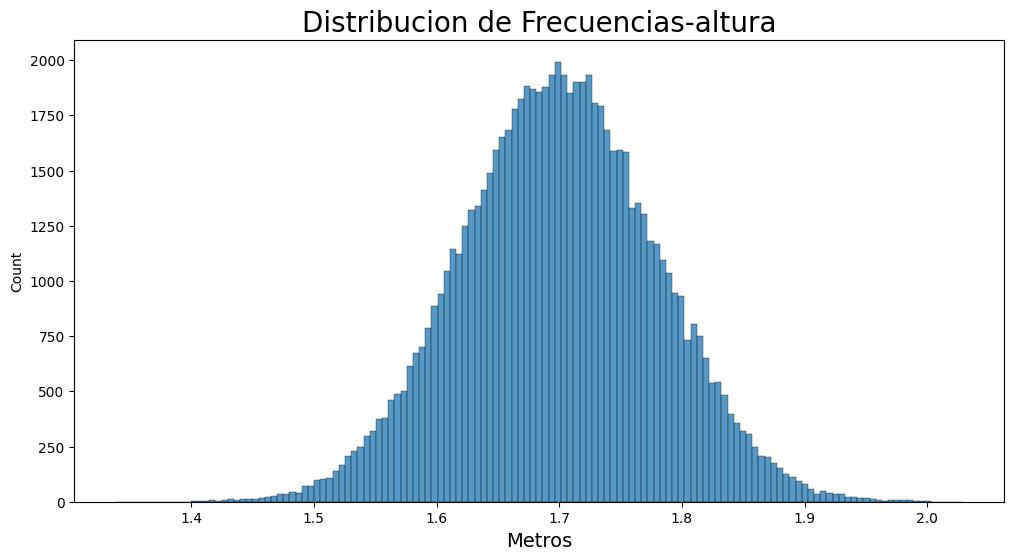

In [38]:
# para la distribución de frecuencias

import seaborn as sns

# histograma
ax=sns.histplot(datos.Altura,kde=False)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribucion de Frecuencias-altura', fontsize=20)

ax.set_xlabel("Metros",fontsize=14)

ax

#La mayor cantidad de personas entre 1.7 metros

<AxesSubplot: xlabel='Renta'>

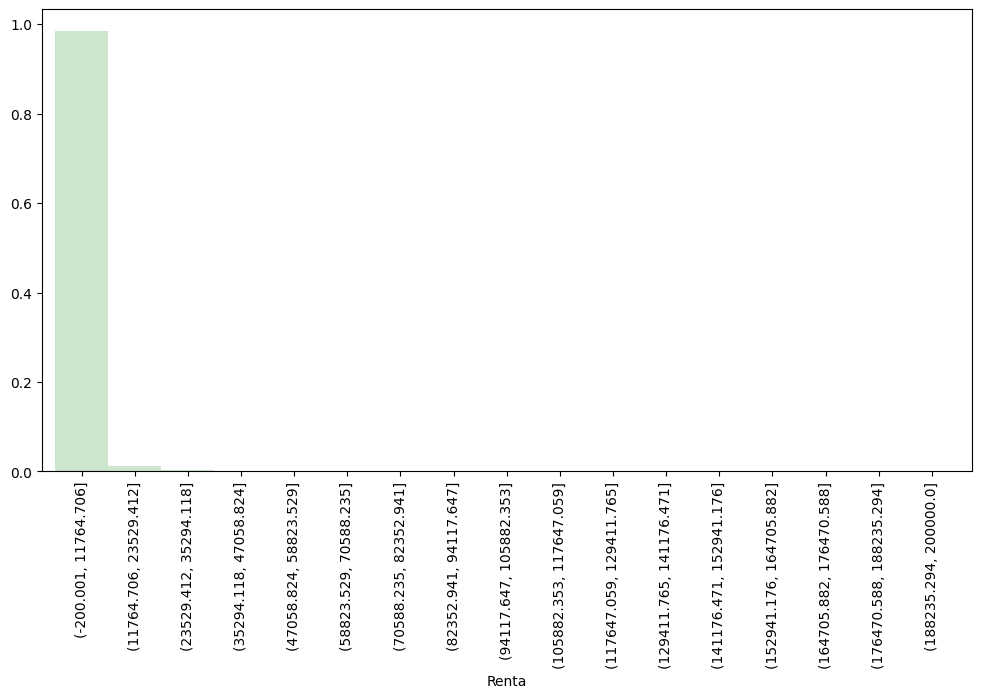

In [40]:
dist_frec_cuantitativas['Porcentual'].plot.bar(width=1, color='green', alpha=0.2, figsize=(12,6))

# Media, mediana y moda

In [ ]:
# resumen de un conjunto de valores
# media aritmética
# 

In [42]:
test = datos.head(5)
test

,CodPostal,Sexo,Edad,Color,Años_Estudio,Renta,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [43]:
media= test.Edad.mean()
media

34.8

In [45]:
#media artimetica de la renta para masculinio y femenino
#media aritmética de la edad
datos.groupby(['Sexo'])['Edad'].mean()

Sexo
0    44.046554
1    44.127554
Name: Edad, dtype: float64

In [47]:
#mediana de edad
mediana= test.Edad.median()
mediana

35.0

In [50]:
# medianade la renta para masculinio y femenino
#mediana de la edad
datos.groupby(['Sexo'])['Edad'].median()



Sexo
0    43.0
1    44.0
Name: Edad, dtype: float64

In [61]:
# hallando la moda
moda= datos.Altura.mode()
moda

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

In [59]:
# medianade la renta para masculinio y femenino
#mediana de la edad
datos.groupby(['Sexo'])['Renta'].mode()

AttributeError: 'SeriesGroupBy' object has no attribute 'mode'

# Percenteiles